In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv('../data/data.csv')

In [3]:
# Display the first few rows of the dataframe
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [4]:

# Understand the structure of the dataset, including the number of rows, columns, and data types.
print("Dataset Shape:", df.shape)
print("Data Types:\n", df.dtypes)

Dataset Shape: (95662, 16)
Data Types:
 TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [5]:
# 2.  Summary Statistics
#Understand the central tendency, dispersion, and shape of the dataset’s distribution.
print("Descriptive Statistics:\n", df.describe())


Descriptive Statistics:
        CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000


In [6]:
# .  Summary Statistics 
print("\nNumerical Summary:\n")
display(df.describe().T)

print("\nCategorical Summary:\n")
display(df.describe(include="object").T)


Numerical Summary:



,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0



Categorical Summary:



,count,unique,top,freq
TransactionId,95662,95662,TransactionId_35670,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405
ChannelId,95662,4,ChannelId_3,56935


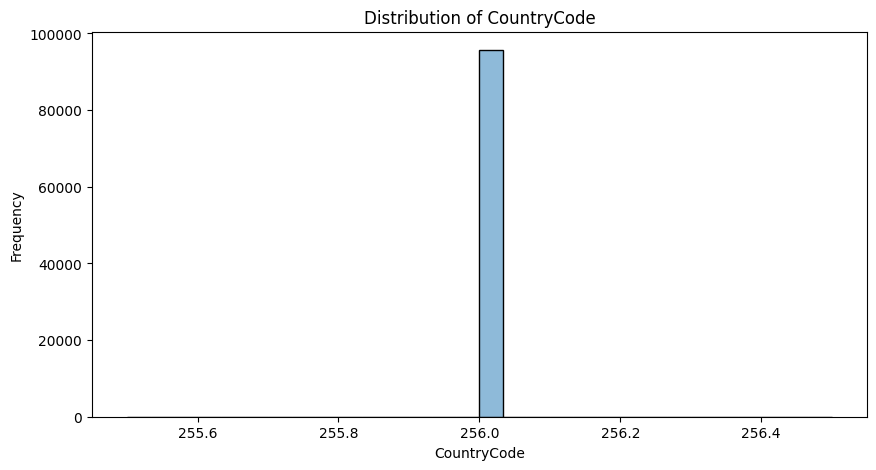

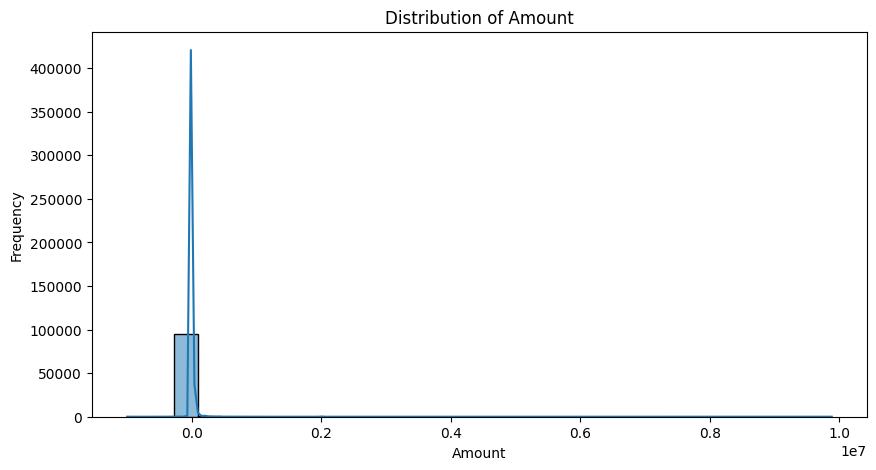

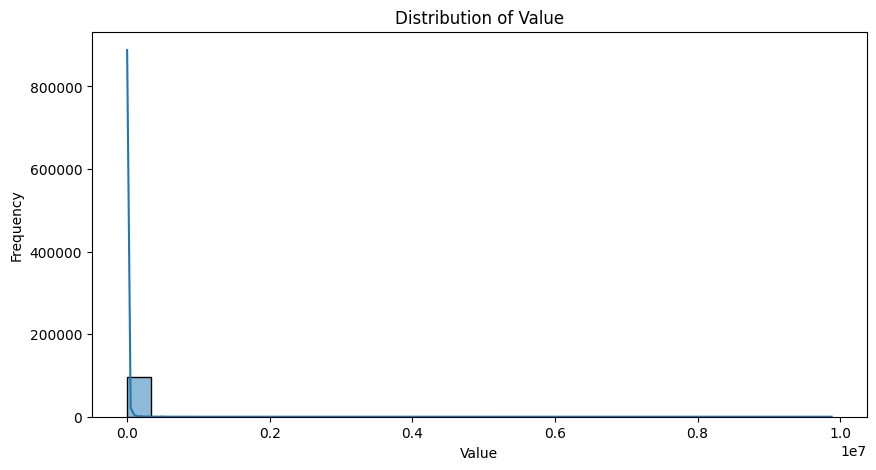

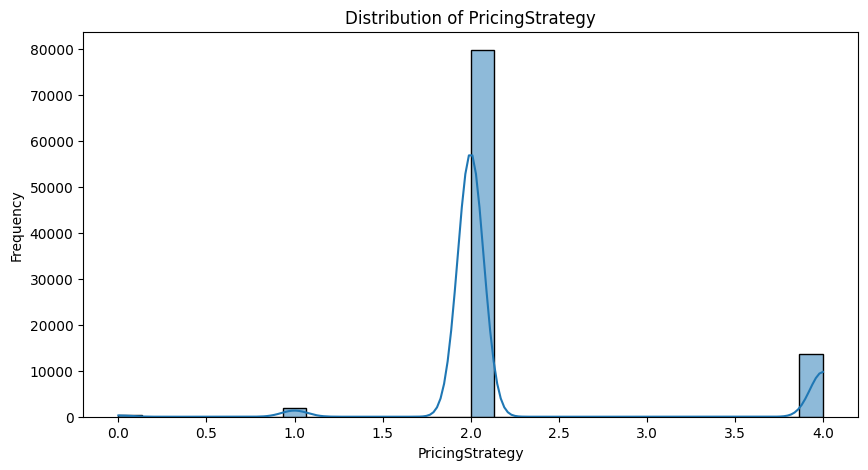

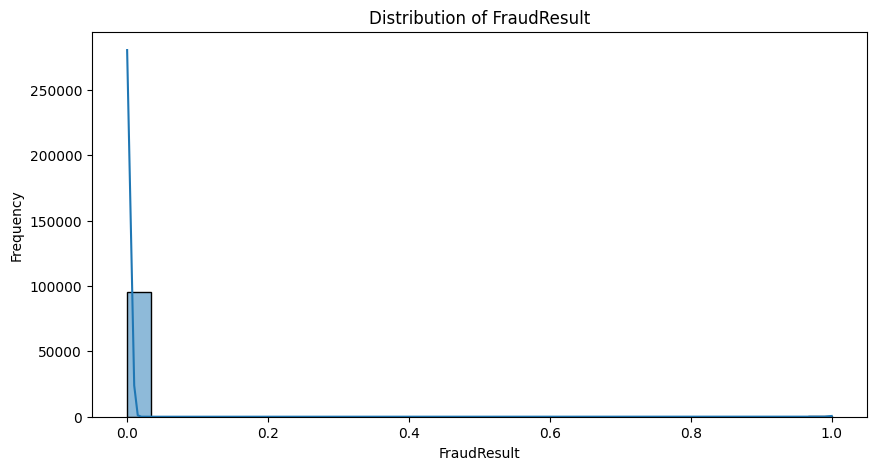

In [7]:
#4.	Distribution of Numerical Features:○	Visualize the distribution of numerical features to identify patterns, skewness, and potential outliers.
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


In [8]:
# Create a dictionary to store outlier counts
numerical_cols = df.select_dtypes(include=['number']).columns
outlier_summary = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = {
        "Outlier Count": outliers.shape[0],
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound
    }

# Convert to DataFrame for easier viewing
outlier_df = pd.DataFrame(outlier_summary).T
display(outlier_df.sort_values(by="Outlier Count", ascending=False))

,Outlier Count,Lower Bound,Upper Bound
Amount,24441.0,-4325.0,7075.0
PricingStrategy,15814.0,2.0,2.0
Value,9021.0,-6812.5,12087.5
FraudResult,193.0,0.0,0.0
CountryCode,0.0,256.0,256.0


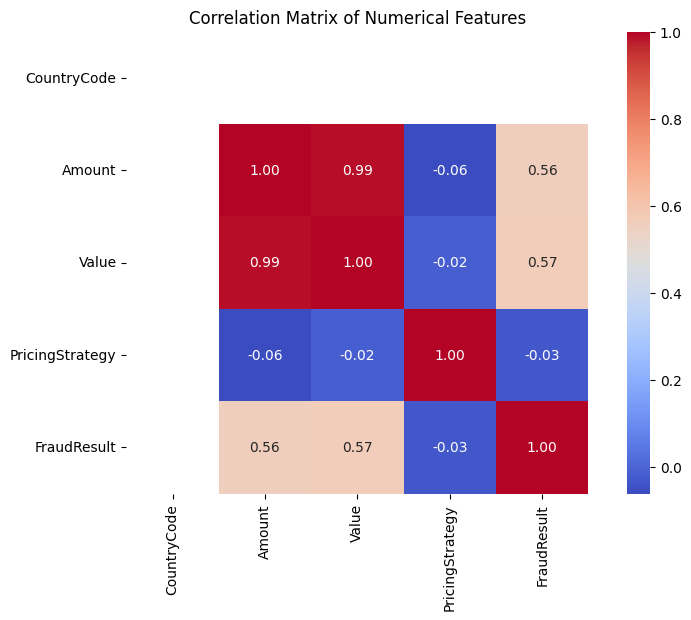

In [9]:
# 5.  Correlation Analysis
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [10]:
# 6. Identifying Missing Values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing values by column:\n")
print(missing)



Missing values by column:

Series([], dtype: int64)


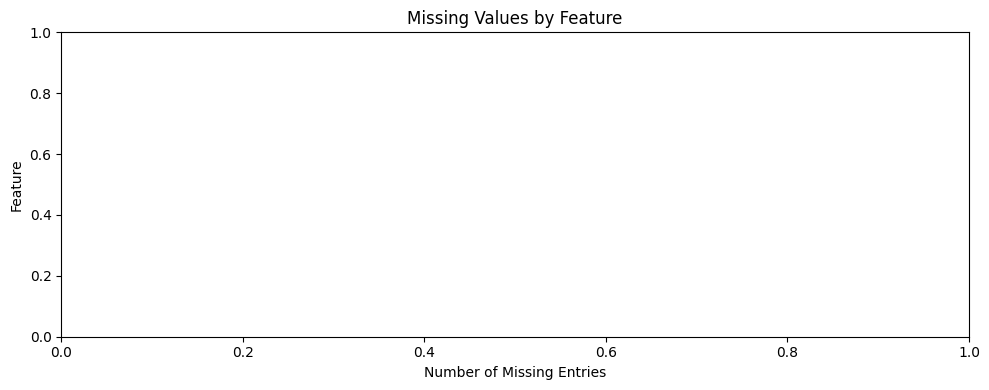

In [11]:
plt.figure(figsize=(10, 4))
sns.barplot(x=missing.values, y=missing.index)
plt.title("Missing Values by Feature")
plt.xlabel("Number of Missing Entries")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

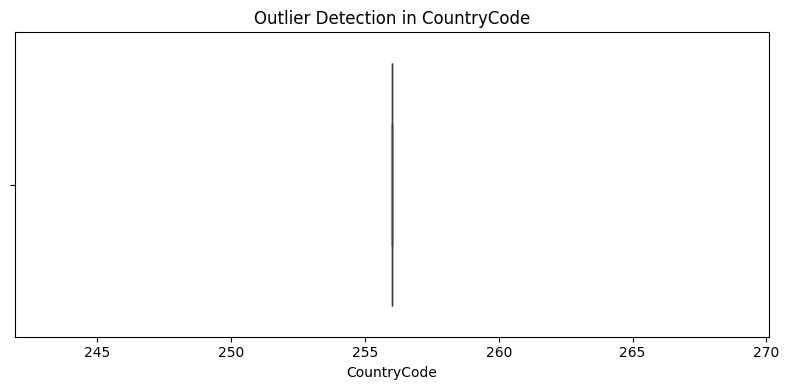

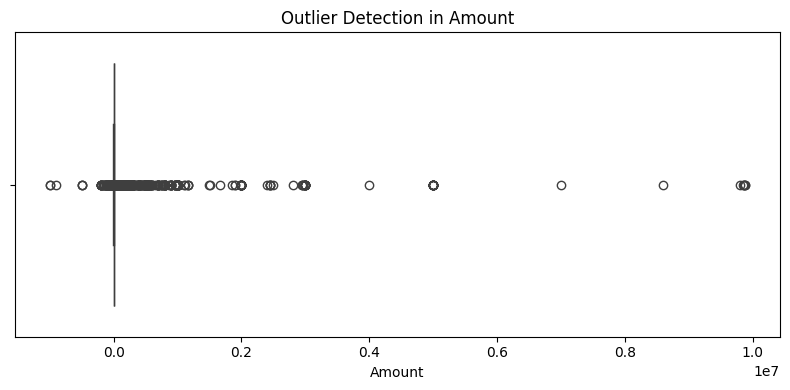

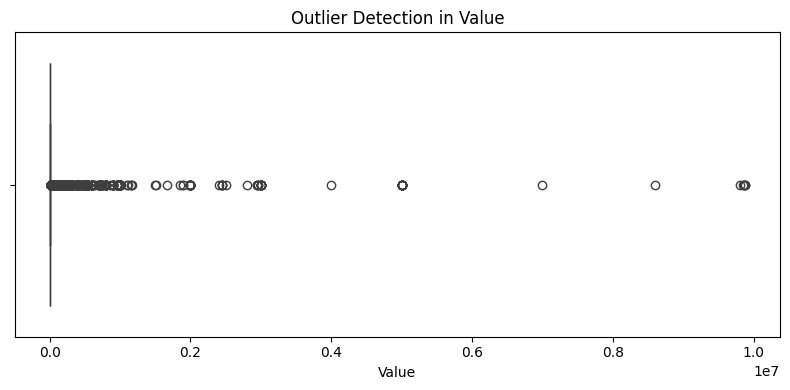

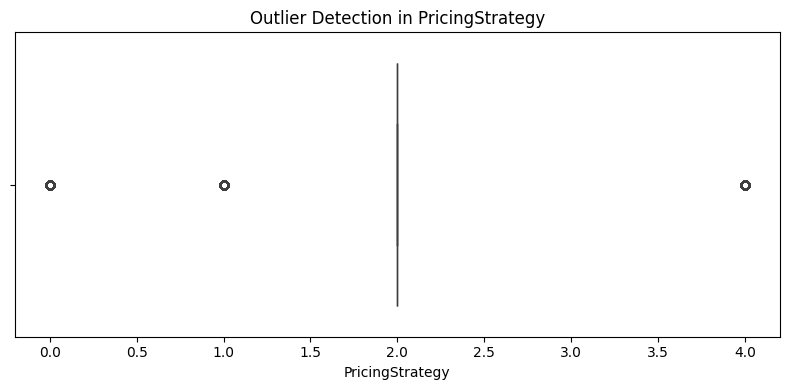

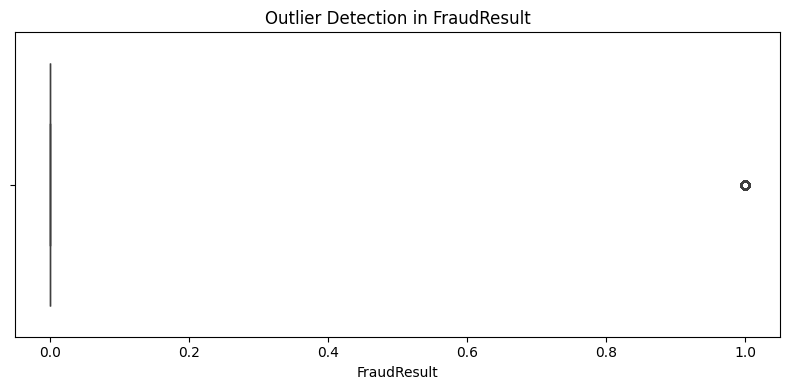

In [12]:
# 7 Outlier Detection (Box Plots)

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection in {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [13]:
#outlier detection
# 4. Outlier Detection
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
for feature in numerical_features:
    outliers = detect_outliers_iqr(df, feature)
    if not outliers.empty:
        print(f"Outliers detected in {feature}:")
        print(outliers[[feature]])
    else:
        print(f"No outliers detected in {feature}.")
        

No outliers detected in CountryCode.
Outliers detected in Amount:
        Amount
3      20000.0
6      10000.0
32     10000.0
39      8000.0
40      8000.0
...        ...
95633  15000.0
95638  15000.0
95640  15000.0
95643  15000.0
95656  50000.0

[24441 rows x 1 columns]
Outliers detected in Value:
       Value
3      21800
52     30000
57     41000
110    17000
114    15000
...      ...
95633  15000
95638  15000
95640  15000
95643  15000
95656  50000

[9021 rows x 1 columns]
Outliers detected in PricingStrategy:
       PricingStrategy
6                    4
19                   4
21                   4
46                   4
58                   1
...                ...
95605                4
95610                4
95634                4
95635                4
95645                1

[15814 rows x 1 columns]
Outliers detected in FraudResult:
       FraudResult
131              1
146              1
155              1
2376             1
2452             1
...            ...
94805       